In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 6-layered CNN with 98.32 % accuracy:

In [ ]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(3,3), input_shape=(224, 224, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [ ]:
def preprocessingImages1(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image


In [ ]:
# import shutil
# s = '/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset'
# d = '/content/drive/MyDrive/New_dataset_fig_sar_brats/backupDataset'
# shutil.copytree(s,d)

In [ ]:
train_data = preprocessingImages1('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Training')

Found 4591 images belonging to 4 classes.


In [ ]:
os.chdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset')

In [ ]:
def preprocessingImages2(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
test_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
val_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/val')

Found 1121 images belonging to 4 classes.


In [ ]:
new = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 15, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'braintumorcnnmodelchanges10.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(train_data, steps_per_epoch=4591//32, epochs=50, validation_data=val_data, validation_steps= 1121//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/50
143/143 [==============================] - ETA: 0s - loss: 1.2761 - categorical_accuracy: 0.6197
Epoch 1: val_categorical_accuracy improved from -inf to 0.18393, saving model to braintumorcnnmodelchanges10.h5
143/143 [==============================] - 111s 510ms/step - loss: 1.2761 - categorical_accuracy: 0.6197 - val_loss: 1.6130 - val_categorical_accuracy: 0.1839 - lr: 0.0010
Epoch 2/50
143/143 [==============================] - ETA: 0s - loss: 0.6318 - categorical_accuracy: 0.7657
Epoch 2: val_categorical_accuracy improved from 0.18393 to 0.28304, saving model to braintumorcnnmodelchanges10.h5
143/143 [==============================] - 75s 522ms/step - loss: 0.6318 - categorical_accuracy: 0.7657 - val_loss: 1.5275 - val_categorical_accuracy: 0.2830 - lr: 0.0010
Epoch 3/50
143/143 [==============================] - ETA: 0s - loss: 0.5221 - categorical_accuracy: 0.8008
Epoch 3: val_categorical_accuracy improved from 0.28304 to 0.51071, saving model to braintumorcnnmodelchan

In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])

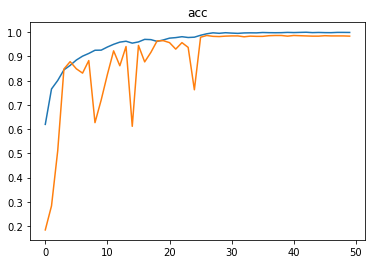

In [ ]:
import matplotlib.pyplot as pyplot
plt.plot(h['categorical_accuracy'])
plt.plot(h['val_categorical_accuracy'])
plt.title('acc')
plt.show()

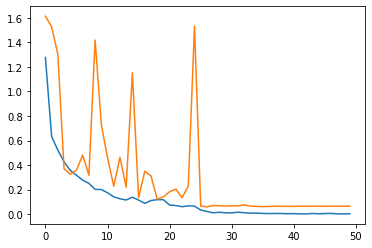

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

In [ ]:
from keras.models import load_model

cnn_model = load_model('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/braintumorcnnmodelchanges10.h5')

In [ ]:
acc = cnn_model.evaluate(test_data)[1]
print("Accuracy of the model is: ",round(acc*100,2),'%')

41/41 [==============================] - 6s 131ms/step - loss: 0.0449 - categorical_accuracy: 0.9832
Accuracy of the model is:  98.32 %


In [ ]:
acc = cnn_model.evaluate(val_data)[1]
print("Accuracy of the model is: ",round(acc*100,2),'%')

36/36 [==============================] - 251s 7s/step - loss: 0.0586 - categorical_accuracy: 0.9866
Accuracy of the model is:  98.66 %


In [ ]:
acc = cnn_model.evaluate(test_data)[1]
print("Accuracy of the model is: ",round(acc*100,2),'%')

41/41 [==============================] - 581s 14s/step - loss: 0.0449 - categorical_accuracy: 0.9832
Accuracy of the model is:  98.32 %


In [ ]:
import cv2
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
dec = {0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}
predictions_test = []
for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/glioma_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/glioma_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = cnn_model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/meningioma_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/meningioma_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = cnn_model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/no_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/no_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = cnn_model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/pituitary_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/pituitary_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = cnn_model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

final_predictions_test = np.array(predictions_test)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
report = metrics.classification_report(true_classes, final_predictions_test, target_names=class_labels)
print(report)

1/1 [==============================] - 0s 101ms/step
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.96      0.98       300
meningioma_tumor       0.96      0.98      0.97       306
        no_tumor       0.99      1.00      0.99       405
 pituitary_tumor       0.99      0.99      0.99       300

        accuracy                           0.98      1311
       macro avg       0.98      0.98      0.98      1311
    weighted avg       0.98      0.98      0.98      1311



In [ ]:
metrics.confusion_matrix(true_classes, final_predictions_test)

array([[288,  11,   0,   1],
       [  0, 300,   4,   2],
       [  0,   1, 404,   0],
       [  1,   2,   0, 297]])

In [ ]:
mat = metrics.confusion_matrix(true_classes, final_predictions_test)

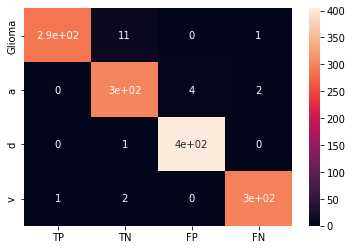

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(np.array(
    [[288,  11,   0,   1],
       [  0, 300,   4,   2],
       [  0,   1, 404,   0],
       [  1,   2,   0, 297]]),columns=['TP','TN','FP','FN'],index=['Glioma','a','d','v'])
sns.heatmap(df,annot=True)

In [ ]:

import pandas as pd
def details(mat):
  tp = []
  fn = []
  fp = []

  for i in range(len(mat)):
    fp_each = 0
    for j in range(i+1):
      if i == j:
        tp.append(mat[i][j])
        fn.append(sum(mat[i]) - mat[i][j])
      else:
        fp_each += mat[j][i]
    fp.append(fp_each)
  print(tp)
  print(fn)
  print(fp)
  return pd.DataFrame(list(zip(tp,fn,fp)),columns=['tp','fp','fn'])

a = details(mat)



[288, 300, 404, 297]
[12, 6, 1, 3]
[0, 11, 4, 3]


In [ ]:
a

,tp,fp,fn
0,288,12,0
1,300,6,11
2,404,1,4
3,297,3,3


In [ ]:

class Cell:

	def __init__(self, r, c):
		self.r = r
		self.c = c
def printSums(mat, arr, n):

	for i in range(0, n):

		Sum = 0; r = arr[i].r; c = arr[i].c

		for j in range(0, R):
			for k in range(0, C):
				if j != r and k != c:
					Sum += mat[j][k]
		print(Sum)

if __name__ == "__main__":

	mat = [[288,  11,   0,   1],
       [  0, 300,   4,   2],
       [  0,   1, 404,   0],
       [  1,   2,   0, 297]]

	R = C = 4
	arr = [Cell(0, 0), Cell(1, 1), Cell(2, 2), Cell(3,3)]
	n = len(arr)
	printSums(mat, arr, n)


1010
991
902
1008


# MobileNET Architecture with 98.63 % Accuracy

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
import os

In [ ]:
def preprocessingImagesNew1(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function = preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image


In [ ]:
# import shutil
# s = '/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset'
# d = '/content/drive/MyDrive/New_dataset_fig_sar_brats/backupDataset'
# shutil.copytree(s,d)

In [ ]:
train_data = preprocessingImagesNew1('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Training')

Found 4591 images belonging to 4 classes.


In [ ]:
os.chdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset')

In [ ]:
def preprocessingImagesNew2(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
test_data = preprocessingImagesNew2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
val_data = preprocessingImagesNew2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/val')

Found 1121 images belonging to 4 classes.


In [ ]:
new = preprocessingImagesNew2('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dropout_3 (Dropout)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              51381248  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                      

In [ ]:
import keras
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 15, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'MobNET.h5', monitor = 'val_accuracy',
                      save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(train_data, steps_per_epoch=4591//32, epochs=50, validation_data=val_data, validation_steps= 1121//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/50
143/143 [==============================] - ETA: 0s - loss: 3.1596 - accuracy: 0.7907 
Epoch 1: val_accuracy improved from -inf to 0.61339, saving model to MobNET.h5
143/143 [==============================] - 2945s 21s/step - loss: 3.1596 - accuracy: 0.7907 - val_loss: 4.1743 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 2/50
143/143 [==============================] - ETA: 0s - loss: 0.3669 - accuracy: 0.9070
Epoch 2: val_accuracy improved from 0.61339 to 0.91518, saving model to MobNET.h5
143/143 [==============================] - 72s 502ms/step - loss: 0.3669 - accuracy: 0.9070 - val_loss: 0.3536 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 3/50
143/143 [==============================] - ETA: 0s - loss: 0.2575 - accuracy: 0.9281
Epoch 3: val_accuracy did not improve from 0.91518
143/143 [==============================] - 67s 465ms/step - loss: 0.2575 - accuracy: 0.9281 - val_loss: 0.8241 - val_accuracy: 0.8357 - lr: 0.0010
Epoch 4/50
143/143 [==============================] - ETA:

In [ ]:
hm1 = history.history
hm1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

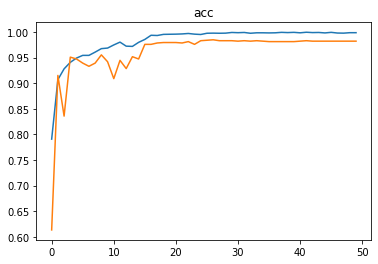

In [ ]:
import matplotlib.pyplot as pyplot
plt.plot(hm1['accuracy'])
plt.plot(hm1['val_accuracy'])
plt.title('acc')
plt.show()

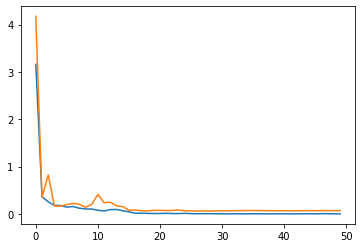

In [ ]:
plt.plot(hm1['loss'])
plt.plot(hm1['val_loss'])

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/MobNET.h5')

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy: {acc*100} %")

<ipython-input-26-e26f214d97ad>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


Test Accuracy: 98.47444891929626 %


In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy: {acc*100} %")

<ipython-input-8-e26f214d97ad>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


Test Accuracy: 98.6270010471344 %


# DenseNET-169 with 96.56 % accuracy

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.densenet import DenseNet169, preprocess_input

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
import os

In [ ]:
def preprocessingImages1(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image


In [ ]:
# import shutil
# s = '/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset'
# d = '/content/drive/MyDrive/New_dataset_fig_sar_brats/backupDataset'
# shutil.copytree(s,d)

In [ ]:
train_data = preprocessingImages1('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Training')

Found 4591 images belonging to 4 classes.


In [ ]:
os.chdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset')

In [ ]:
def preprocessingImages2(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
test_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
val_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/val')

Found 1121 images belonging to 4 classes.


In [ ]:
new = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
base_model = DenseNet169(input_shape=(224,224,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten_4 (Flatten)         (None, 81536)             0         
                                                                 
 dropout_12 (Dropout)        (None, 81536)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              83493888  
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dropout_14 (Dropout)        (None, 512)              

In [ ]:
import keras
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 15, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'braintumorDENSENET169NEWAPPROACHFINAL.h5', monitor = 'val_accuracy',
                      save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(train_data, steps_per_epoch=4591//32, epochs=35, validation_data=val_data, validation_steps= 1121//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/35
143/143 [==============================] - ETA: 0s - loss: 4.3010 - accuracy: 0.7326
Epoch 1: val_accuracy improved from -inf to 0.88482, saving model to braintumorDENSENET169NEWAPPROACHFINAL.h5
143/143 [==============================] - 101s 601ms/step - loss: 4.3010 - accuracy: 0.7326 - val_loss: 0.3554 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 2/35
143/143 [==============================] - ETA: 0s - loss: 0.4496 - accuracy: 0.8533
Epoch 2: val_accuracy improved from 0.88482 to 0.90804, saving model to braintumorDENSENET169NEWAPPROACHFINAL.h5
143/143 [==============================] - 87s 611ms/step - loss: 0.4496 - accuracy: 0.8533 - val_loss: 0.2688 - val_accuracy: 0.9080 - lr: 0.0010
Epoch 3/35
143/143 [==============================] - ETA: 0s - loss: 0.3613 - accuracy: 0.8807
Epoch 3: val_accuracy did not improve from 0.90804
143/143 [==============================] - 74s 517ms/step - loss: 0.3613 - accuracy: 0.8807 - val_loss: 0.4651 - val_accuracy: 0.8839 - lr: 0.0

In [ ]:
hm1 = history.history
hm1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

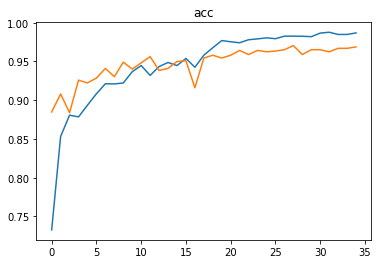

In [ ]:
import matplotlib.pyplot as pyplot
plt.plot(hm1['accuracy'])
plt.plot(hm1['val_accuracy'])
plt.title('acc')
plt.show()

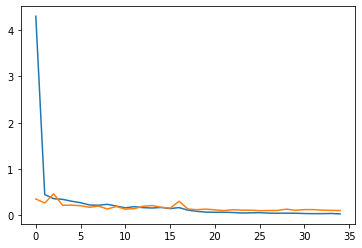

In [ ]:
plt.plot(hm1['loss'])
plt.plot(hm1['val_loss'])

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/braintumorDENSENET169NEWAPPROACHFINAL.h5')

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy: {acc*100} %")

<ipython-input-81-e26f214d97ad>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


Test Accuracy: 96.56750559806824 %


In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy: {acc*100} %")

<ipython-input-38-e26f214d97ad>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


Test Accuracy: 96.56750559806824 %


In [ ]:
import cv2
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
dec = {0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}
predictions_test = []
for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/glioma_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/glioma_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/meningioma_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/meningioma_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/no_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/no_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/pituitary_tumor/'):
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing/pituitary_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    # print(lst)
    p = lst.index(max(lst))
    predictions_test.append(p)

final_predictions_test = np.array(predictions_test)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
report = metrics.classification_report(true_classes, final_predictions_test, target_names=class_labels)
print(report)

metrics.confusion_matrix(true_classes, final_predictions_test)

mat = metrics.confusion_matrix(true_classes, final_predictions_test)


# To calculate TP,FP,TN
import pandas as pd
def details(mat):
  tp = []
  fn = []
  fp = []

  for i in range(len(mat)):
    fp_each = 0
    for j in range(i+1):
      if i == j:
        tp.append(mat[i][j])
        fn.append(sum(mat[i]) - mat[i][j])
      else:
        fp_each += mat[j][i]
    fp.append(fp_each)
  print(tp)
  print(fn)
  print(fp)
  return pd.DataFrame(list(zip(tp,fn,fp)),columns=['tp','fp','fn'])

a = details(mat)

# To calculate TN
class Cell:

	def __init__(self, r, c):
		self.r = r
		self.c = c
def printSums(mat, arr, n):
	for i in range(0, n):

		Sum = 0; r = arr[i].r; c = arr[i].c
		for j in range(0, R):
			for k in range(0, C):
				if j != r and k != c:
					Sum += mat[j][k]
		print(Sum)

mat = [[288,  11,   0,   1],
      [  0, 300,   4,   2],
      [  0,   1, 404,   0],
      [  1,   2,   0, 297]] # yaha pe tera confusion matrix daal de

R = C = 4
arr = [Cell(0, 0), Cell(1, 1), Cell(2, 2), Cell(3,3)]
n = len(arr)
printSums(mat, arr, n)


1/1 [==============================] - 0s 229ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.99      0.91      0.95       300
meningioma_tumor       0.91      0.95      0.93       306
        no_tumor       0.99      1.00      0.99       405
 pituitary_tumor       0.97      1.00      0.98       300

        accuracy                           0.97      1311
       macro avg       0.97      0.96      0.96      1311
    weighted avg       0.97      0.97      0.97      1311

[273, 290, 404, 299]
[27, 16, 1, 1]
[0, 25, 6, 10]
1010
991
902
1008


In [ ]:
a

,tp,fp,fn
0,273,27,0
1,290,16,25
2,404,1,6
3,299,1,10


In [ ]:
metrics.confusion_matrix(true_classes, final_predictions_test)

mat = metrics.confusion_matrix(true_classes, final_predictions_test)
print(mat)

[[273  25   1   1]
 [  2 290   5   9]
 [  0   1 404   0]
 [  0   1   0 299]]


In [ ]:
mat = [[273,  25,   1,   1],
 [  2, 290,   5,   9],
 [  0,   1, 404,   0],
 [  0,   1,   0, 299]]

R = C = 4
arr = [Cell(0, 0), Cell(1, 1), Cell(2, 2), Cell(3,3)]
n = len(arr)
printSums(mat, arr, n)

1009
978
900
1001


1/1 [==============================] - 0s 51ms/step


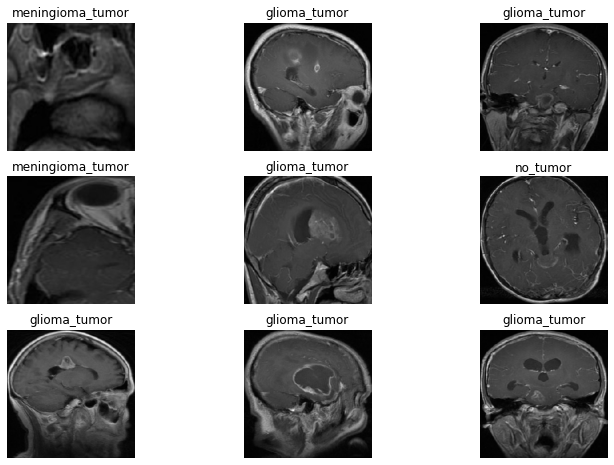

In [ ]:
import cv2
dec = {0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing/glioma_tumor/')[100:109]:
    plt.subplot(3,3,c)
    path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing/glioma_tumor/"+i
    img = load_img(path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    input_arr = np.expand_dims(input_arr,axis=0)
    pred = model.predict(input_arr)
    pred = pred.reshape((4))
    lst = list(pred)
    plt.title(dec[lst.index(max(lst))])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

# DenseNET-201 with accuracy 95.34 %

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.densenet import DenseNet201, preprocess_input

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
import os

In [ ]:
def preprocessingImages1(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image


In [ ]:
# import shutil
# s = '/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset'
# d = '/content/drive/MyDrive/New_dataset_fig_sar_brats/backupDataset'
# shutil.copytree(s,d)

In [ ]:
train_data = preprocessingImages1('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Training')

Found 4591 images belonging to 4 classes.


In [ ]:
os.chdir('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset')

In [ ]:
def preprocessingImages2(path):
  """
    Input: Path
    Output: Preprocessed Images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
test_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
val_data = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/dataset/val')

Found 1121 images belonging to 4 classes.


In [ ]:
new = preprocessingImages2('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing')

Found 1311 images belonging to 4 classes.


In [ ]:
base_model = DenseNet201(input_shape=(224,224,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dropout (Dropout)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 1024)              96338944  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
import keras
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 15, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'braintumorDENSENET201NEWAPPROACHFINAL.h5', monitor = 'val_accuracy',
                      save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(train_data, steps_per_epoch=4591//32, epochs=35, validation_data=val_data, validation_steps= 1121//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/35
143/143 [==============================] - ETA: 0s - loss: 4.4057 - accuracy: 0.7388 
Epoch 1: val_accuracy improved from -inf to 0.88304, saving model to braintumorDENSENET201NEWAPPROACHFINAL.h5
143/143 [==============================] - 3693s 26s/step - loss: 4.4057 - accuracy: 0.7388 - val_loss: 0.3475 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 2/35
143/143 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.8596
Epoch 2: val_accuracy improved from 0.88304 to 0.89554, saving model to braintumorDENSENET201NEWAPPROACHFINAL.h5
143/143 [==============================] - 82s 571ms/step - loss: 0.4977 - accuracy: 0.8596 - val_loss: 0.4037 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 3/35
143/143 [==============================] - ETA: 0s - loss: 0.3344 - accuracy: 0.8916
Epoch 3: val_accuracy improved from 0.89554 to 0.92679, saving model to braintumorDENSENET201NEWAPPROACHFINAL.h5
143/143 [==============================] - 81s 569ms/step - loss: 0.3344 - accura

In [ ]:
hm1 = history.history
hm1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

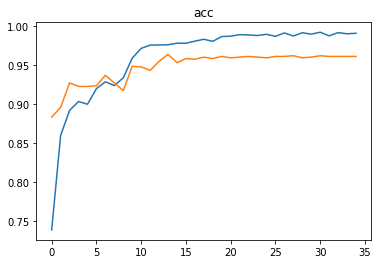

In [ ]:
import matplotlib.pyplot as pyplot
plt.plot(hm1['accuracy'])
plt.plot(hm1['val_accuracy'])
plt.title('acc')
plt.show()

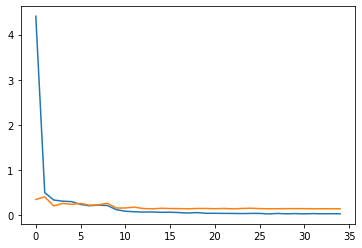

In [ ]:
plt.plot(hm1['loss'])
plt.plot(hm1['val_loss'])

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/braintumorDENSENET201NEWAPPROACHFINAL.h5')

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy: {acc*100} %")

<ipython-input-19-e26f214d97ad>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


Test Accuracy: 95.34706473350525 %


1/1 [==============================] - 4s 4s/step
[9.6234904e-09, 1.35199025e-05, 5.5804655e-08, 0.9999865]
Pituitary Tumor


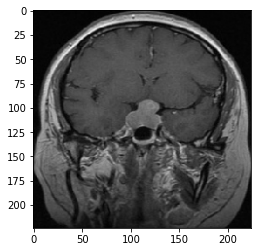

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

path = "/content/drive/MyDrive/New_dataset_fig_sar_brats/cleaned_dataset/Testing/pituitary_tumor/Te-piTr_0001.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
input_arr.shape
plt.imshow(input_arr)

input_arr = np.expand_dims(input_arr,axis=0)
pred = model.predict(input_arr)
pred = pred.reshape((4))
lst = list(pred)
print(lst)

if lst.index(max(lst)) == 0:
  print('Glioma Tumor')
elif lst.index(max(lst)) == 1:
  print('Meningioma Tumor')
elif lst.index(max(lst)) == 2:
  print('No Tumor')
elif lst.index(max(lst)) == 3:
  print('Pituitary Tumor')

# VGG-16 with accuracy 98.62 %

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16


import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

labels = ["glioma","meningioma","notumor","pituitary"]

for i in labels:
  folder_path = os.path.join("/content/Training/",i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(labels.index(i))

In [ ]:
for i in labels:
  folder_path = os.path.join("/content/Testing/",i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(labels.index(i))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train,y_train = shuffle(X_train,y_train,random_state=10)

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model1 = Sequential()

model1.add(conv_base)

model1.add(Flatten())
model1.add(Dense(512,activation="relu"))
model1.add(Dense(512,activation="relu"))
model1.add(Dense(4,activation="softmax"))


In [ ]:
conv_base.trainable = False

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
179/179 [==============================] - 52s 230ms/step - loss: 2.7155 - accuracy: 0.8454 - val_loss: 0.7950 - val_accuracy: 0.8780
Epoch 2/25
179/179 [==============================] - 37s 209ms/step - loss: 0.3617 - accuracy: 0.9342 - val_loss: 0.2159 - val_accuracy: 0.9443
Epoch 3/25
179/179 [==============================] - 36s 201ms/step - loss: 0.1877 - accuracy: 0.9610 - val_loss: 0.4226 - val_accuracy: 0.9420
Epoch 4/25
179/179 [==============================] - 37s 207ms/step - loss: 0.1435 - accuracy: 0.9697 - val_loss: 0.6827 - val_accuracy: 0.9100
Epoch 5/25
179/179 [==============================] - 37s 205ms/step - loss: 0.1776 - accuracy: 0.9722 - val_loss: 0.2478 - val_accuracy: 0.9527
Epoch 6/25
179/179 [==============================] - 37s 204ms/step - loss: 0.0940 - accuracy: 0.9849 - val_loss: 0.4593 - val_accuracy: 0.9443
Epoch 7/25
179/179 [==============================] - 37s 205ms/step - loss: 0.2459 - accuracy: 0.9708 - val_loss: 0.6834 - val_ac

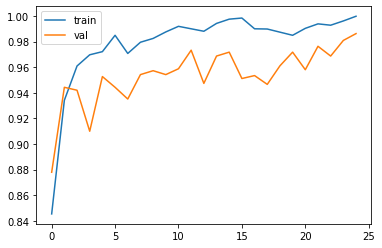

In [ ]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="val")
plt.legend()

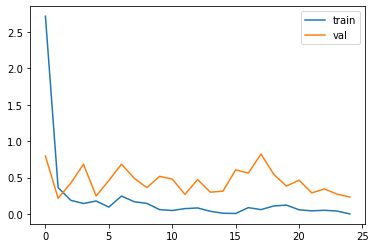

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()

In [ ]:
model1.evaluate(X_test,y_test)

41/41 [==============================] - 7s 165ms/step - loss: 0.2322 - accuracy: 0.9863


[0.23218804597854614, 0.986270010471344]

In [ ]:
y_pred = model1.predict(X_test).argmax(axis=1)
y_pred

41/41 [==============================] - 7s 166ms/step


array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
matrix = confusion_matrix(y_test,y_pred)

In [ ]:
matrix

array([[286,  14,   0,   0],
       [  2, 302,   1,   1],
       [  0,   0, 405,   0],
       [  0,   0,   0, 300]])

In [ ]:
FP = matrix.sum(axis=0) - np.diag(matrix)
FN = matrix.sum(axis=1) - np.diag(matrix)
TP = np.diag(matrix)
TN = matrix.sum() - (FP + FN + TP)
print(TP)
print(TN)
print(FP)
print(FN)


[286 302 405 300]
[1009  991  905 1010]
[ 2 14  1  1]
[14  4  0  0]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       300
           1       0.96      0.99      0.97       306
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [ ]:
model1.save("CNN_MODEL_0_98627.h5")

# ResNET-152 with accuracy 97.10 %

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16


import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

labels = ["glioma","meningioma","notumor","pituitary"]

for i in labels:
  folder_path = os.path.join("/content/Training/",i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(labels.index(i))

In [ ]:
for i in labels:
  folder_path = os.path.join("/content/Testing/",i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(labels.index(i))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train,y_train = shuffle(X_train,y_train,random_state=10)

In [ ]:
from keras.applications.resnet import ResNet152

In [ ]:
conv_base1 = ResNet152(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

234698864/234698864 [==============================] - 11s 0us/step


In [ ]:
conv_base1.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
model2 = Sequential()

model2.add(conv_base1)

model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(4,activation="softmax"))


In [ ]:
conv_base1.trainable = False

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
179/179 [==============================] - 70s 330ms/step - loss: 3.3264 - accuracy: 0.8358 - val_loss: 0.2849 - val_accuracy: 0.9169
Epoch 2/25
179/179 [==============================] - 56s 313ms/step - loss: 0.3470 - accuracy: 0.9200 - val_loss: 0.3761 - val_accuracy: 0.9214
Epoch 3/25
179/179 [==============================] - 56s 316ms/step - loss: 0.2166 - accuracy: 0.9489 - val_loss: 0.3738 - val_accuracy: 0.9169
Epoch 4/25
179/179 [==============================] - 56s 313ms/step - loss: 0.1603 - accuracy: 0.9606 - val_loss: 0.2263 - val_accuracy: 0.9413
Epoch 5/25
179/179 [==============================] - 56s 315ms/step - loss: 0.0847 - accuracy: 0.9764 - val_loss: 0.2383 - val_accuracy: 0.9535
Epoch 6/25
179/179 [==============================] - 56s 312ms/step - loss: 0.1109 - accuracy: 0.9790 - val_loss: 0.3989 - val_accuracy: 0.9336
Epoch 7/25
179/179 [==============================] - 56s 313ms/step - loss: 0.1455 - accuracy: 0.9753 - val_loss: 0.3495 - val_ac

In [ ]:
model2.evaluate(X_test,y_test)

41/41 [==============================] - 10s 250ms/step - loss: 0.2068 - accuracy: 0.9710


[0.20681874454021454, 0.9710144996643066]

In [ ]:
y_pred = model2.predict(X_test).argmax(axis=1)
y_pred

41/41 [==============================] - 12s 241ms/step


array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.9710144927536232

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       300
           1       0.92      0.97      0.94       306
           2       1.00      1.00      1.00       405
           3       0.99      0.98      0.99       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [ ]:
confusion_matrix

array([[276,  24,   0,   0],
       [  5, 297,   1,   3],
       [  0,   0, 405,   0],
       [  3,   2,   0, 295]])

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
print(TP)
print(TN)
print(FP)
print(FN)


[276 297 405 295]
[1003  979  905 1008]
[ 8 26  1  3]
[24  9  0  5]


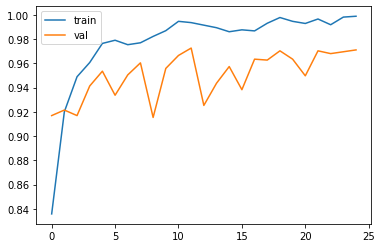

In [ ]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="val")
plt.legend()

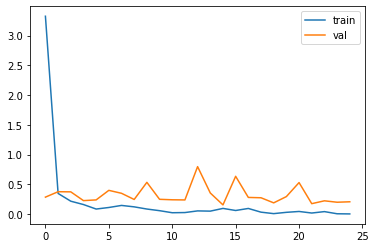

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()

In [ ]:
model2.save("CNN_MODEL_0_97101.h5")

In [ ]:
import plotly.express as px
models = ['Custom CNN (98.32 %)','MobileNET (98.63 %)','ResNET-152 (97.71 %)','VGG-16 (98.62 %)','DenseNET (96.56 %)']
acc = [98.32,98.63,97.71,98.62,96.56]

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(models,acc)),columns = ['Models','Accuracies'])

In [ ]:
px.bar(df,x='Models',y='Accuracies')